In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
# from scipy.stats import norm, uniform, multivariate_normal as multinorm, norm
# from tqdm import tqdm
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=8)

from pertussis import *
logger.setLevel(logging.INFO)

# Make Simulation


## Init

In [3]:
# Load MCMC
mcmc = load_mcmc('./chains/1117-rho-60-multi-sigma-best-mcmc_v2_0.pkl')
print (mcmc['name'],': ',len(mcmc['chain']))
print (mcmc['tally'])
names = mcmc['names']

mcmc_v2_0 :  28880
10000


### Create subsets with effective sample size

In [4]:
# Take Subsets
take_subsets(mcmc)

Effective sample size: [ 1431.5101  1795.8336  1326.091   1742.7282]
Subset length: 1345


### Create Policies

In [31]:
# Create Policies
default = init_policy('default')
everybody = init_policy('everybody', vax_ages=a_u)
no_one = init_policy('no_one', vax_ages=[])

# possible_ages = [5,6,7,8,9,10,11,12,13,15,18]

policies = [default, everybody, no_one]

# Remove
# only_age = [5,6,7,10,13]
# only_age = [5,7,13]
# for age in only_age:
#     p_name = 'REMOVE_{:02d}'.format(age)
#     tmp_ages = (2 / 12, 4 / 12, 6 / 12, 1, age)
#     tmp_policy = init_policy(p_name, vax_ages=tmp_ages)
#     policies.append(tmp_policy)
    
# Shift
# possible_ages = [3,4,5,6,7,13]
possible_ages = [5,7,13]
for i in range(len(possible_ages)):
    for j in range(i):
        agej, agei = possible_ages[j],possible_ages[i]
#         if (agej == 7) and (agei == 13): continue
        p_name = 'SHIFT_{:02d}_{:02d}'.format(agej,agei)
        tmp_ages = (2 / 12, 4 / 12, 6 / 12, 1, agej, agei)
        tmp_policy = init_policy(p_name, vax_ages=tmp_ages)
        policies.append(tmp_policy)

# # Add
# additional_ages = [3,4,6,7,15]
# # additional_ages = [5]
# for age in additional_ages:
#     p_name = 'ADD_{:02d}'.format(age)
#     tmp_ages = (2 / 12, 4 / 12, 6 / 12, 1, 5, 13, age)
#     tmp_policy = init_policy(p_name, vax_ages=tmp_ages)
#     policies.append(tmp_policy)
# # Create the simulation


# # dynamic_add_ages = [5]
# # for age in dynamic_add_ages:
# #     for mod_year in range(4):
# #         p_name = 'DYNAMIC7_{:02d}_{:1d}'.format(age, mod_year)
# #         tmp_ages = (2 / 12, 4 / 12, 6 / 12, 1, 7, 13)
# #         tmp_policy = init_policy(p_name, vax_ages=tmp_ages, mod_year=mod_year, dynamic=age)
# #         policies.append(tmp_policy)
        
# # Dynamic
# dynamic_add_ages = [7]
# for age in dynamic_add_ages:
#     for mod_year in range(4):
#         p_name = 'DYNAMIC_{:02d}_{:1d}'.format(age, mod_year)
#         tmp_ages = (2 / 12, 4 / 12, 6 / 12, 1, 5, 13)
#         tmp_policy = init_policy(p_name, vax_ages=tmp_ages, mod_year=mod_year, dynamic=age)
#         policies.append(tmp_policy)

# # Control for dynamic
# dynamic_add_ages = [7]
# for age in dynamic_add_ages:
#     p_name = 'CONTROL_{:02d}'.format(age)
#     tmp_ages = (2 / 12, 4 / 12, 6 / 12, 1, 5, 13)
#     tmp_policy = init_policy(p_name, vax_ages=tmp_ages, control=age)
#     policies.append(tmp_policy)
        
print (len(policies))
simulation = init_simulation("rho-60-36k", mcmc, policies)
simulation.keys()

6


dict_keys(['data_hospital', 'p', 'policies', 'data_sick', 'subset_pick', 'start', 'pregnant_coverage', 'end', 'name', 'dist', 'mcmc'])

In [55]:
simulation['n_policies'] = len(policies)

## Load

In [2]:
#load simulation
simulation = load_mcmc('./simulations/rho-60-36k.pkl')
mcmc = simulation['mcmc']
print(simulation['name'])
print(len(simulation['p']))
print(mcmc['name'])
print(len(mcmc['chain']))
print(mcmc['tally'])

rho-60-36k
720
mcmc_v2_0
36100
10000


## Prepare

In [32]:
# Distributions
dists = mcmc['dists']

# Times
r_start = mcmc['start']
r_end = mcmc['end']
step = 1 / N

# Data
data_M, months = mcmc['datax'], mcmc['datay']
# data2, data2n, years = cases_yearly()
state_0 = mcmc['state_0']

# SIMULATE

In [33]:
len(simulation['p'])

0

In [45]:
simulate_future(simulation, 100)

L 1345



In [11]:
#Save simulation
# save_mcmc(simulation, './simulations/')

## Create pairwise

In [46]:
create_pairwise(simulation)
policies = simulation['policies']
default = policies[0]
metric_names = ['sick','hospital','vaccines']
age_names = ['0-1','1-21','21+']

# Charts

## Pregnant Coverage

In [37]:
policy['sick']

[array([ 193910.8948,  736417.268 ,  541314.3035]),
 array([ 206034.0376,  769462.6827,  410705.1149]),
 array([ 156260.5341,  744218.5328,  410526.77  ]),
 array([ 219123.614 ,  840487.4039,  405027.4639]),
 array([ 180692.4044,  736075.4498,  414136.657 ]),
 array([ 302259.6509,  572102.3142,  303893.0545]),
 array([ 253817.4078,  740577.7494,  397959.8158]),
 array([ 168333.8289,  777819.9448,  443348.6639]),
 array([ 191290.0565,  660655.6135,  420638.414 ]),
 array([ 150559.0863,  771724.3159,  327670.2252])]

In [49]:
np.ceil(4.0)

4.0

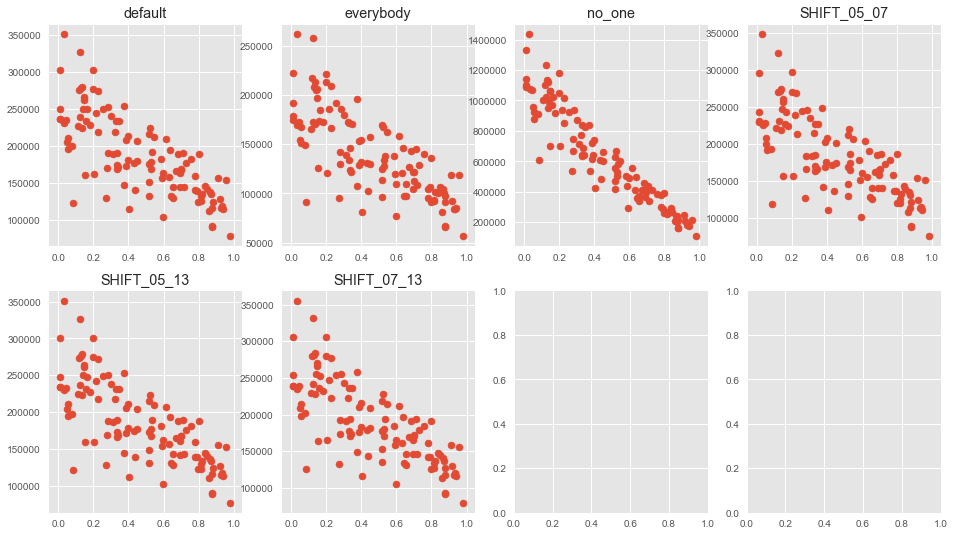

In [56]:
fig, axs = plt.subplots(int(np.ceil(len(simulation['policies'])/4)),4, figsize=(16,9))
axs = np.concatenate(axs)
cover = np.array(simulation['pregnant_coverage'])
sick_kids = np.array(policies[0]['sick'])[:,0]
for i in range(simulation['n_policies']):
    policy = policies[i]
    ax = axs[i]
    ax.set_title(policy['name'])
    ax.scatter(cover, np.array(policy['sick'])[:,0])

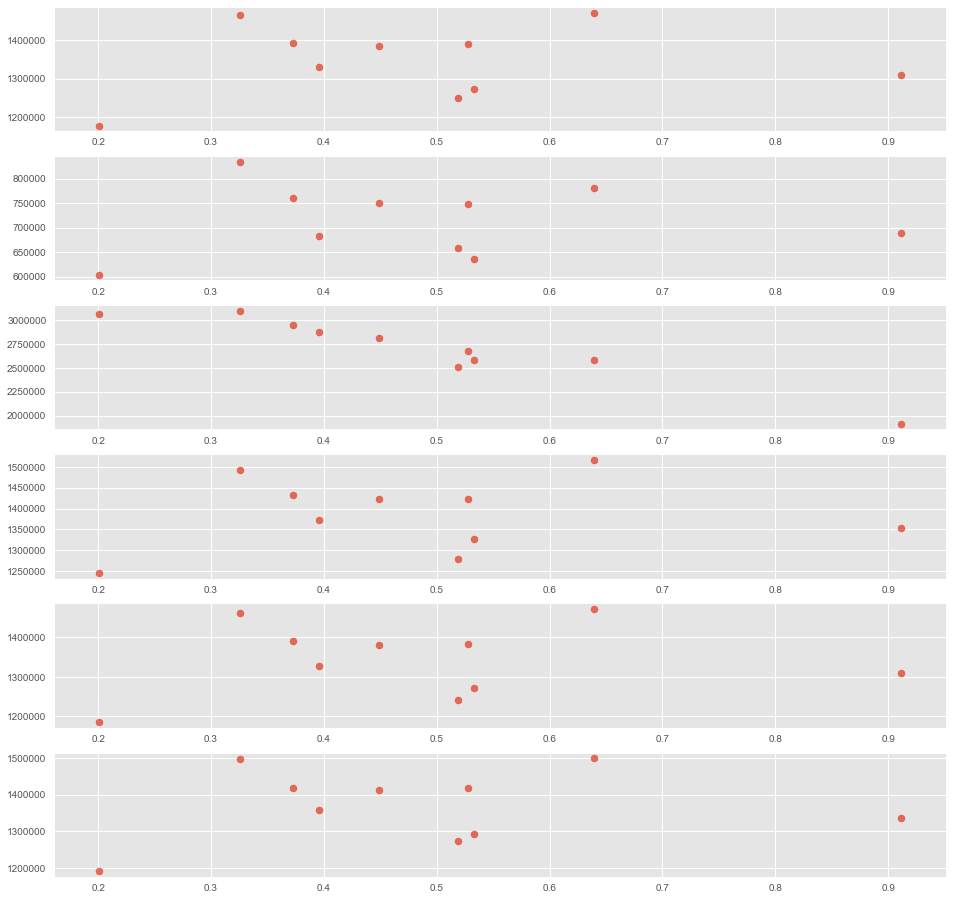

In [44]:
fig, ax = plt.subplots(len(policies), figsize=(16,16))
for i, policy in enumerate(policies):
    ax[i].scatter(simulation['pregnant_coverage'], np.array(policy['sick']).sum(axis=1), alpha=0.8)

## Correlations

no_one


ValueError: x and y must be the same size

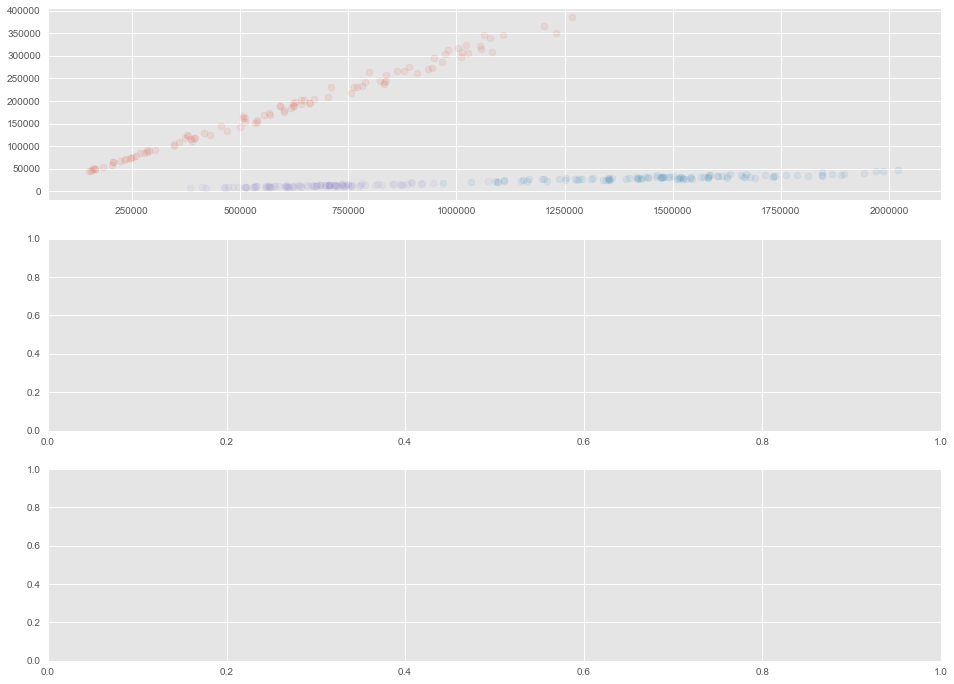

In [30]:
fig, ax = plt.subplots(3,figsize=(16,12))
policy = policies[2]
print (policy['name'])
for i in range(3):
    ax[0].scatter(np.array(policy['sick'])[:,i], np.array(policy['hospital'])[:,i], label=age_names[i], alpha=0.1)
#     ax[1].scatter(np.array(policy['vaccines'])[:,i], np.array(policy['sick'])[:,i], label=age_names[i], alpha=0.1)
#     ax[2].scatter(np.array(policy['vaccines'])[:,2], np.array(policy['sick'])[:,2], label=age_names[i], alpha=0.1)
ax[1].scatter(simulation['pregnant_coverage'], np.array(policy['sick'])[:,2], label=age_names[i], alpha=0.5)
simulation['pregnant_coverage']
ax[0].set_xlabel('Sick')
ax[0].set_ylabel('Hospital')
fig.suptitle(policy['name'])                           
ax[0].legend()
plt.show()

In [12]:
fontdict={'fontsize':12}

In [16]:
metric_diffs = ["{}_diff".format(m) for m in metric_names]# + ['ratio_diff']
compare_policies = policies#[:1] + policies[3:]
policy_names = [policy['name'] for policy in compare_policies]
bp = [np.array([ix[metric].sum(axis=1) for ix in compare_policies]).T for metric in metric_diffs]
bp += [np.array([ix['ratio_diff'] for ix in compare_policies]).T]
bp1y = [np.array([ix[metric][0,:] for ix in compare_policies]).T for metric in metric_diffs]

# DataFrame
df_sick = pd.DataFrame(data=bp[0], columns=policy_names)
df_hospital = pd.DataFrame(data=bp[1], columns=policy_names)
df_ratio = pd.DataFrame(data=bp[3], columns=policy_names)

In [17]:
# colors
colors = {}
for p in policies:
    name = p['name']
    if 'REMOVE' in name:
        colors[name] = 'C0'
    elif 'SHIFT' in name:
        colors[name] = 'C1'
    elif 'ADD' in name:
        colors[name] = 'C4'
    elif 'DYNAMIC' in name:
        colors[name] = 'C5'
    elif 'CONTROL' in name:
        colors[name] = 'C6'
    else:
        colors[name] = 'C3'

## Comparison

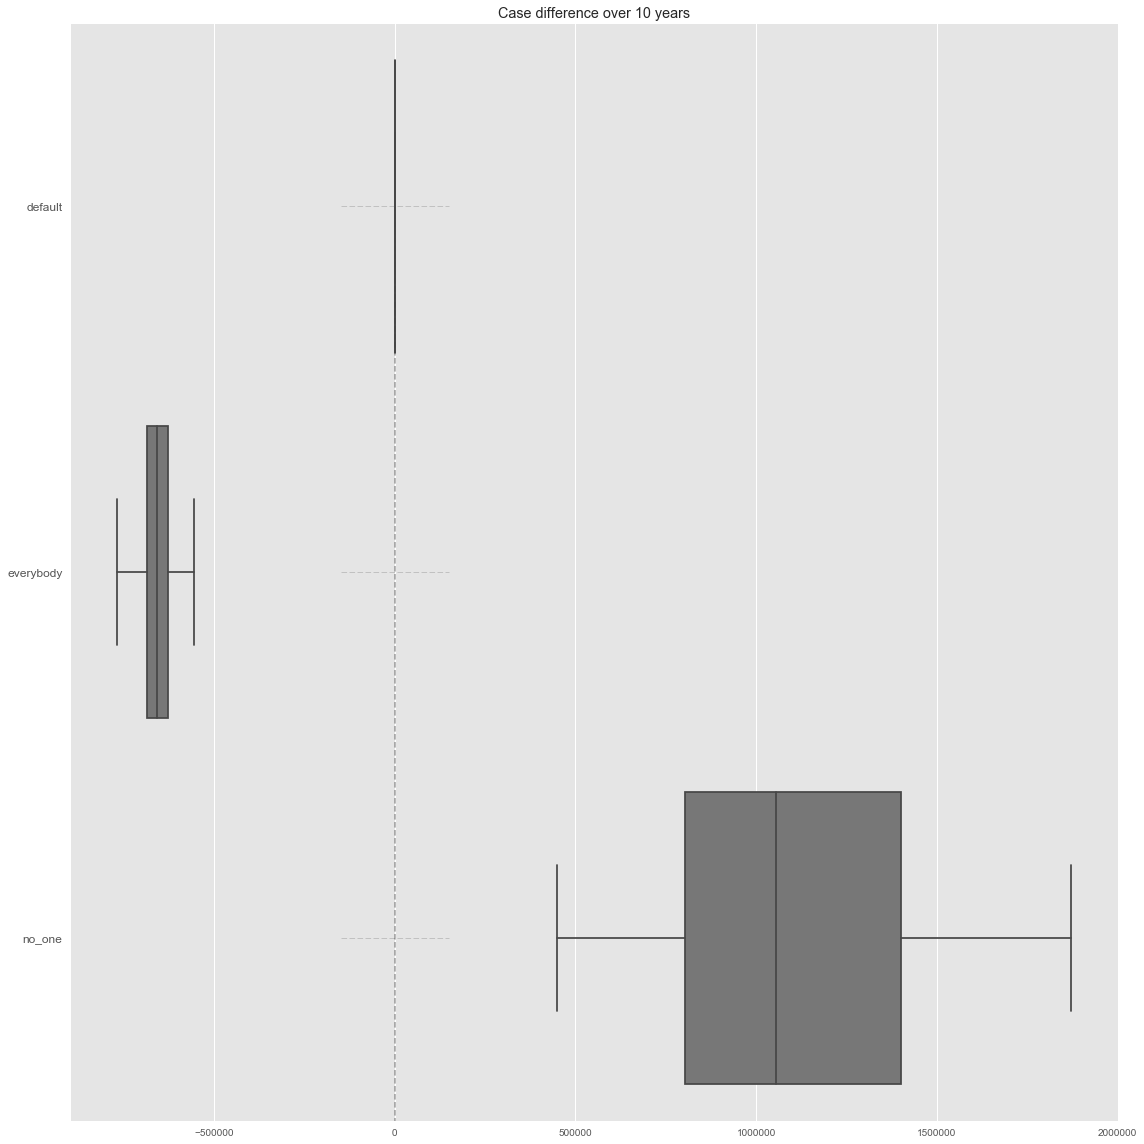

In [20]:
fig, axs = plt.subplots(1,figsize=(16,16))
# x = np.array([ix['sick_diff'].sum(axis=1) for ix in compare_policies]).T
# x.shape
ax=axs#[0]
sns.boxplot(data=df_sick, ax=ax, orient="h", palette=colors)
ax.set_yticklabels(policy_names, fontdict=fontdict)#, rotation='vertical')
ax.set_title("Case difference over 10 years")
ax.vlines(0,0,len(compare_policies),linestyles='--',alpha=0.3)
lims = -150000, 150000
ax.hlines(np.arange(len(compare_policies)),*lims,linestyles='--',alpha=0.3, zorder=-5, lw=0.5)
# ax.set_xlim(*lims)

# ax=axs[1]
# sns.boxplot(data=bp1y[0], ax=ax, orient="h")
# ax.set_yticklabels([])
# ax.set_title("Sick babies (0-1) difference over 10 years")
# ax.vlines(0,0,len(compare_policies),linestyles='--',alpha=0.3)
plt.tight_layout()
plt.show()

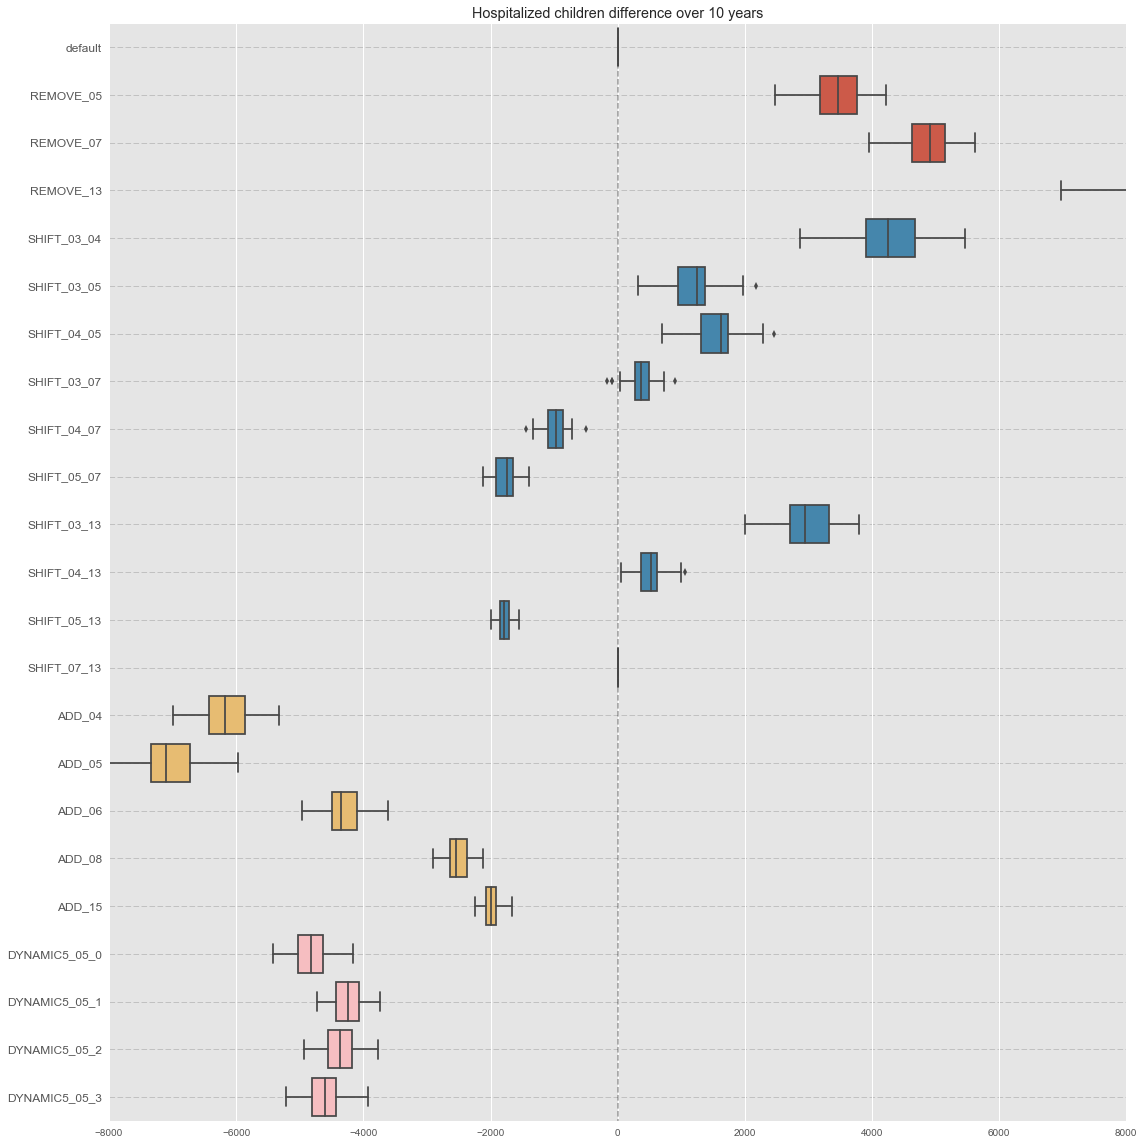

In [59]:
fig, axs = plt.subplots(1,figsize=(16,16))
ax=axs#[0]
sns.boxplot(data=df_hospital, ax=ax, orient="h",palette=colors)
ax.set_yticklabels(policy_names, fontdict=fontdict)#, rotation='vertical')
ax.set_title("Hospitalized children difference over 10 years")
ax.vlines(0,0,len(compare_policies),linestyles='--',alpha=0.3)
lims = -8000, 8000
ax.hlines(np.arange(len(compare_policies)),*lims,linestyles='--',alpha=0.3, zorder=-5, lw=0.5)
ax.set_xlim(*lims)

# ax=axs[1]
# sns.boxplot(data=bp1y[0]/bp1y[2], ax=ax, orient="h")
# ax.set_yticklabels([])
# ax.set_title("Sick babies (0-1) difference over 10 years")
# ax.vlines(0,0,len(compare_policies),linestyles='--',alpha=0.3)
plt.tight_layout()
plt.show()

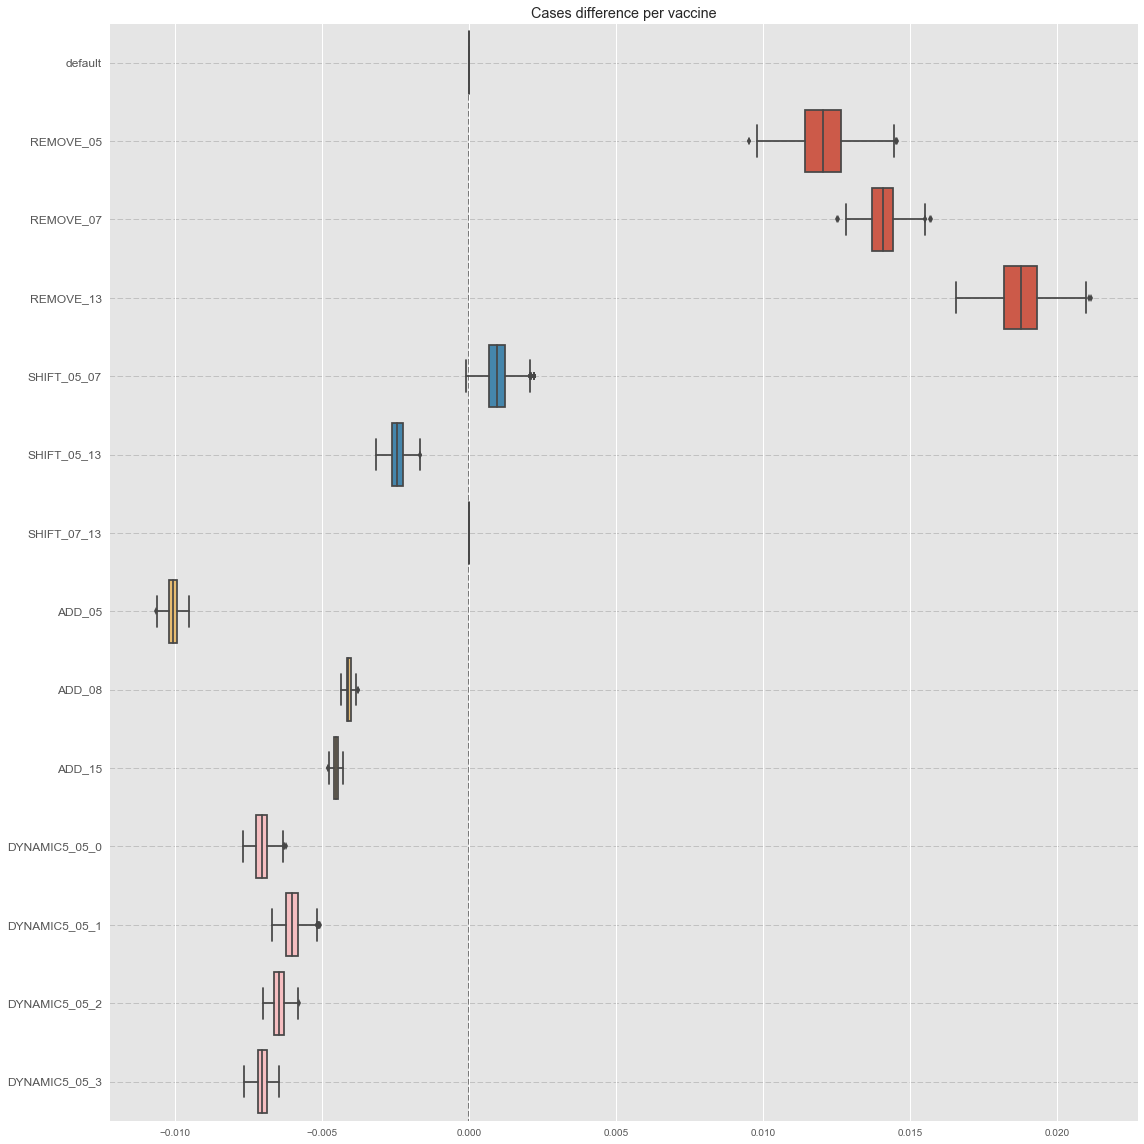

In [47]:
fig, axs = plt.subplots(1,figsize=(16,16))
ax=axs#[0]
sns.boxplot(data=df_ratio, ax=ax, orient="h",palette=colors)
ax.set_yticklabels(policy_names, fontdict=fontdict)#, rotation='vertical')
ax.set_title("Cases difference per vaccine")
ax.vlines([0, np.median(df_ratio['default'])],0,len(compare_policies),linestyles='--',alpha=0.3, zorder=-5)
lims = ax.get_xlim()
ax.hlines(np.arange(len(compare_policies)),*lims,linestyles='--',alpha=0.3, zorder=-5, lw=0.5)
ax.set_xlim(*lims)
# ax=axs[1]
# sns.boxplot(data=bp1y[0]/bp1y[2], ax=ax, orient="h")
# ax.set_yticklabels([])
# ax.set_title("Sick babies (0-1) difference over 10 years")
# ax.vlines(0,0,len(compare_policies),linestyles='--',alpha=0.3)
plt.tight_layout()
plt.show()

In [136]:
len(policies)

24

In [ ]:
gelman_rubin([mc])

## Histogram

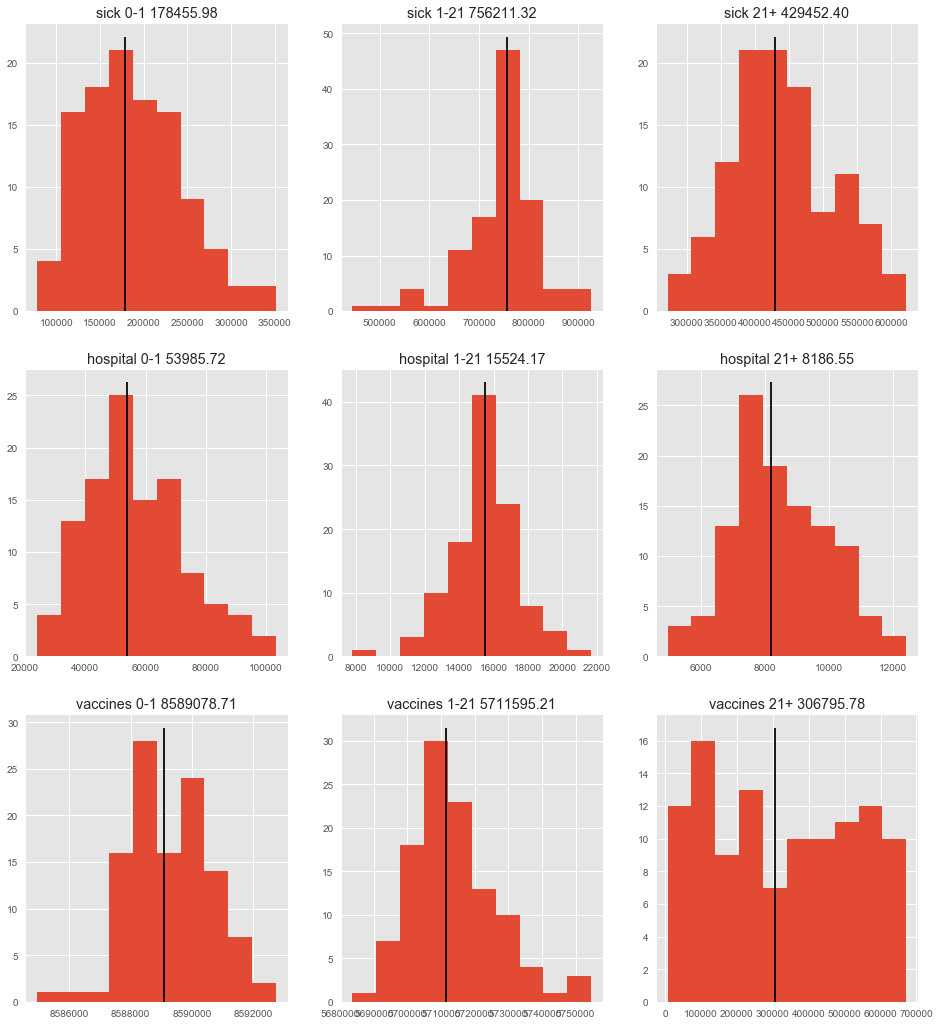

In [47]:
fig, axs = plt.subplots(3,3,figsize=(16,18))
policy = default
for i, metric in enumerate(metric_names): # i - i is ax row: result type
#     print me`
    for age in range(3): # j is age
        arr = np.array(policy[metric])[:,age]
        ax = axs[i,age]
        ax.hist(arr)
        m = ax.get_ylim()[1]
        ax.vlines(np.median(arr), 0, m)
        ax.set_title('{} {} {:.2f}'.format(metric,age_names[age], np.median(arr)))
